In [1]:
import pandas
import ast
import datetime
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# read dataframe
d=pandas.read_csv("data/df2020-03-25.csv")
# Convert string representation of list to list
d['values']=d['values'].apply(lambda x : ast.literal_eval(x))


In [3]:
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report
0,0,1,Table,False,False,[1],Situation report - 64Coronavirus disease 2019 ...
1,1,1,casesanddeaths.Dataasof,False,False,[24],Situation report - 64Coronavirus disease 2019 ...
2,2,1,March,False,False,[2020],Situation report - 64Coronavirus disease 2019 ...
3,3,1,China,False,False,"[81747, 146, 3283, 7, 0]",Situation report - 64Coronavirus disease 2019 ...
4,4,1,RepublicofKorea,False,False,"[9037, 76, 120, 9, 0]",Situation report - 64Coronavirus disease 2019 ...


In [4]:
# get date from report string: find ')' character and then there is the date
# d['report'].unique()
d['date']=d['report'].apply(lambda x: datetime.datetime.strptime(x[x.index(')')+1:].strip(), '%d %B %Y'))
d=d.sort_values(by=['date'])
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date
6288,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
6272,0,1,HubeiProvince,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
6273,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
6274,2,1,BeijingMunicipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21
6275,3,1,ShanghaiMunicipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21


In [5]:
# the number of confirmed cases is in values list, the position depends on the structure of the report
# (NOTE: for china's places WHO changes structure so last reports are different from the first ones)


# there should be a row for each situation report and country
# the situation reports have different structures, WHO do not keep the same structure for all the reports
# but there are some wrong records that are not related to country so detect them in order to remove them
# so try to group by report and detect for each report the wrong records
d['n_values']=d['values'].apply(lambda x: len(x))
d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values
6288,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
6272,0,1,HubeiProvince,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
6273,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
6274,2,1,BeijingMunicipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1
6275,3,1,ShanghaiMunicipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1


In [6]:
d[d['name']=='Hubei']

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values
6000,0,1,Hubei,False,False,[7153],Situation report - 12Novel Coronavirus (2019-n...,2020-02-01,1
5929,0,1,Hubei,False,False,[11177],Situation report - 14 - Erratum Novel Coronavi...,2020-02-03,1
5797,0,1,Hubei,False,False,[13522],Situation report - 15Novel Coronavirus (2019-n...,2020-02-04,1
5863,0,1,Hubei,False,False,[13522],Situation report - 15Novel Coronavirus (2019-n...,2020-02-04,1
5734,0,1,Hubei,False,False,[16678],Situation report - 16 - ErratumNovel Coronavir...,2020-02-05,1
5663,0,1,Hubei,False,False,"[22, 112]",Situation report - 18Novel Coronavirus (2019-n...,2020-02-07,2
5593,0,1,Hubei,False,False,"[24, 953]",Situation report - 19Novel Coronavirus (2019-n...,2020-02-08,2
5524,0,1,Hubei,False,False,"[27, 100]",Situation report - 20Novel Coronavirus (2019-n...,2020-02-09,2
5455,0,1,Hubei,False,False,[29631],Situation report - 21Novel Coronavirus (2019-n...,2020-02-10,1
5381,0,1,Hubei,False,False,[31728],Situation report - 22Novel Coronavirus (2019-n...,2020-02-11,1


In [7]:
# set index of number of cases in values list
d['idx_cases']=-1
d.loc[~d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=1 # this is for china data, get second value
d.loc[d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=-2 # this is for china data, get second to last value
d.loc[d['n_table']>1,'idx_cases']=0 # records not in the first table (table not with china data) has the value in first position
d.loc[d['n_values']==1,'idx_cases']=0 # there is only one value
# this is for china data, if there is no index set than this is the case for taking first one and multiply values by 1000
chinaDataAtBeginning = (d['idx_cases']==-1) & (d['date']<datetime.datetime(2020,3,16)) # after 2020-03-16 WHO puts all in one table both china and other data
chinaDataAtBeginning = (chinaDataAtBeginning) & (d['name']!='Total') # the values for Total rows are right, so exclude them
d.loc[chinaDataAtBeginning, 'values']=d.loc[chinaDataAtBeginning,'values'].apply(lambda x: [el*1000 for el in x])
d.loc[d['idx_cases']==-1,'idx_cases']=0

d.head()

,Unnamed: 0,n_table,name,structureWithDailyNumbers,structureWithPopulation,values,report,date,n_values,idx_cases
6288,16,1,https://www.who.int/ith/2020-,False,False,[901],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
6272,0,1,HubeiProvince,False,False,[258],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
6273,1,1,Guangdong,False,False,[14],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
6274,2,1,BeijingMunicipality,False,False,[5],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0
6275,3,1,ShanghaiMunicipality,False,False,[1],Situation report - 1Novel Coronavirus (2019-nC...,2020-01-21,1,0


In [8]:
# check length limits
# not greater than length
d.loc[d['idx_cases']>=d['n_values'],'idx_cases']=d.loc[d['idx_cases']>=d['n_values'],'n_values']-1
# not lower than length
d.loc[d['idx_cases']+d['n_values']<0,'idx_cases']=0 # china data that take the third to last but there is not enough values, so take the first one

In [9]:
d['cases']=[row['values'][min(row['idx_cases'],row['n_values']-1)] for index, row in d.iterrows()]


In [10]:
d['name']=d['name'].str.replace(' Municipality','') # remove Municipality substring in order to have the same name for all reports
d['name']=d['name'].str.replace('conveyance (Japan)','(Diamond Princess)') # use only (Diamond Princess) instead of other aliases
d['name']=d['name'].str.replace('^Republic of\)$','Iran (Islamic Republic of)') # there are some records missing the first part

d.loc[(d['name']=='Total') & (d['n_table'] == 1),'name'] = 'China' # first reports have detail for each municipality of China and a last row with Total


In [11]:
# get countries with more cases
def getCountriesWithHighestCases(d,min_cases):
    cm=d.groupby(['name']).agg({'cases':['max']})
    cm.columns = ['_'.join(col) for col in cm.columns]
    cm=cm.reset_index()
    cm=cm.sort_values(by=['cases_max'],ascending=False)
    cm=cm[cm['cases_max']>min_cases] # consider at least min_cases
    return cm

min_cases=800
cm = getCountriesWithHighestCases(d, min_cases)
cm

,name,cases_max
128,Grandtotal,372757
285,Subtotalforallregions,372045
75,China,81747
312,Totals,68584
155,Hubei,67794
175,Italy,63927
26,(n=,44067
326,UnitedStatesofAmerica,42164
281,Spain,33089
33,America,31573


In [12]:
# remove rows with invalid names and rows with number of cases equals to 2019 and 2020, these are wrong records
cm=cm[~cm['name'].str.contains('China\*|otal|^((?![a-zA-Z]))|\d|https',regex=True)]
cm=cm[(cm['cases_max']!=2019) & (cm['cases_max']!=2020) & (cm['cases_max']!=2019000)]
cm=cm[~cm['name'].str.contains('January|,|/|nCoV|Unspecified',regex=True)]
countries=[c for c in cm['name'] if c not in 'ubei the remaining on regions Table']
countries

c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


['China',
 'Hubei',
 'Italy',
 'UnitedStatesofAmerica',
 'Spain',
 'America',
 'Germany',
 'Iran(IslamicRepublicof)',
 'France',
 'RepublicofKorea',
 'Switzerland',
 'TheUnitedKingdom',
 'Netherlands',
 'Austria',
 'Belgium',
 'Norway',
 'Portugal',
 'Sweden',
 'Australia',
 'Brazil',
 'Turkey',
 'Malaysia',
 'Denmark',
 'Canada',
 'Guangdong',
 'Henan',
 'Israel',
 'Czechia',
 'Zhejiang',
 'Japan',
 'Ireland',
 'Hunan',
 'Anhui',
 'Jiangxi',
 'Pakistan',
 'Luxembourg',
 'Thailand']

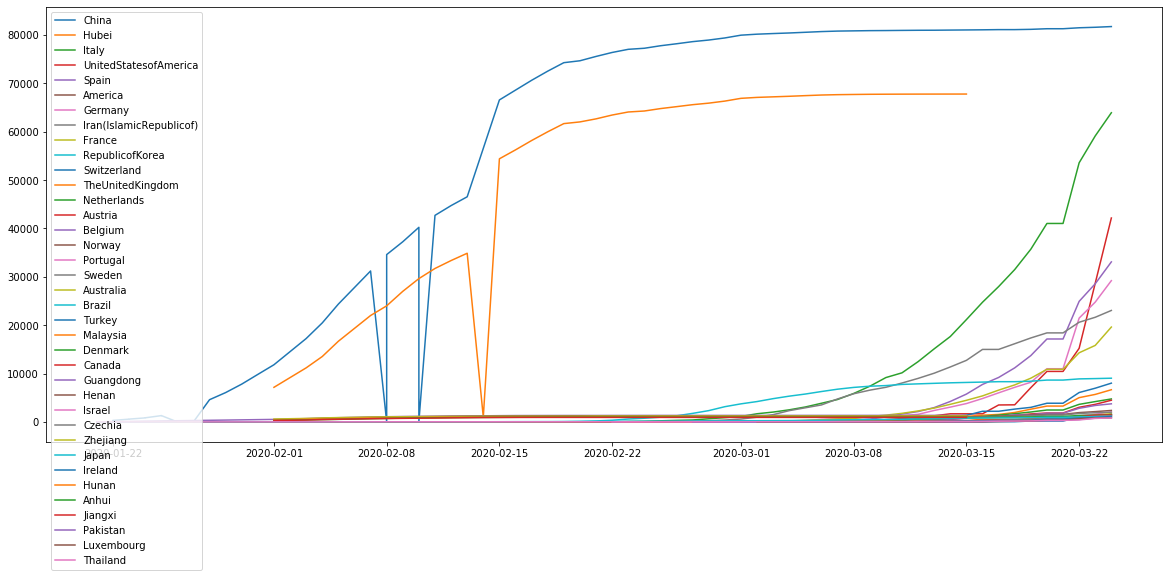

In [13]:
def plotAndSave(d, countries, column_x,path):
    plt.figure(figsize=(20,8))
    for country in countries:
        plt.plot( column_x, 'cases', data=d[d['name']==country], marker='', label=country)
    plt.legend()
    plt.savefig(path)
    
path = 'epidemiologicalCurveByCountry.png'
plotAndSave(d, countries, 'date', path)

In [14]:
# check the rows about Hubei that have less than 10k cases, it is strange the value for the 14th February 2020
anomalies = d.loc[(d['name']=='Hubei') & (d['date']>=datetime.datetime(2020,2,13)) & (d['date']<=datetime.datetime(2020,2,16)),['name','date','values','idx_cases','cases']]
anomalies.style.set_properties(subset=['values'], **{'width-min': '300px'}) # increase width for value column in order to visualize all values
# the right value for 2020 02 14 is 51986 but in values there is 51 and 986 separated (this is caused by parsing problems)

,name,date,values,idx_cases,cases
5235,Hubei,2020-02-13 00:00:00,"[5917, 34874]",1,34874
5165,Hubei,2020-02-14 00:00:00,"[5917, 1728, 3095, 4823, 1154, 116, 36, 602, 15, 384, 51, 986, 1318]",-2,986
5094,Hubei,2020-02-15 00:00:00,"[5917, 1282, 1138, 2420, 1216, 139, 37884, 16522, 54406, 1457]",-2,54406
5022,Hubei,2020-02-16 00:00:00,"[5917, 955, 888, 1843, 1036, 139, 38839, 17410, 56249, 1596]",-2,56249


In [15]:
# the same thing seems to happen for China data
d.loc[(d['name']=='China')& (d['date']>=datetime.datetime(2020,1,22)) & (d['date']<=datetime.datetime(2020,2,14)),['name','date','values','idx_cases','cases']]
# there are duplicates row (because of conversion of Total row to China row), however one of the two rows have the right value

,name,date,values,idx_cases,cases
6247,China,2020-01-22,[309],0,309
6265,China,2020-01-22,"[314, 3]",0,314
6220,China,2020-01-23,[571],0,571
6242,China,2020-01-23,"[581, 4, 4]",0,581
6191,China,2020-01-24,[830],0,830
6215,China,2020-01-24,"[846, 4]",0,846
6176,China,2020-01-25,[1297],0,1297
6186,China,2020-01-25,[1320],0,1320
6170,China,2020-01-26,[2],0,2
6152,China,2020-01-27,[2],0,2


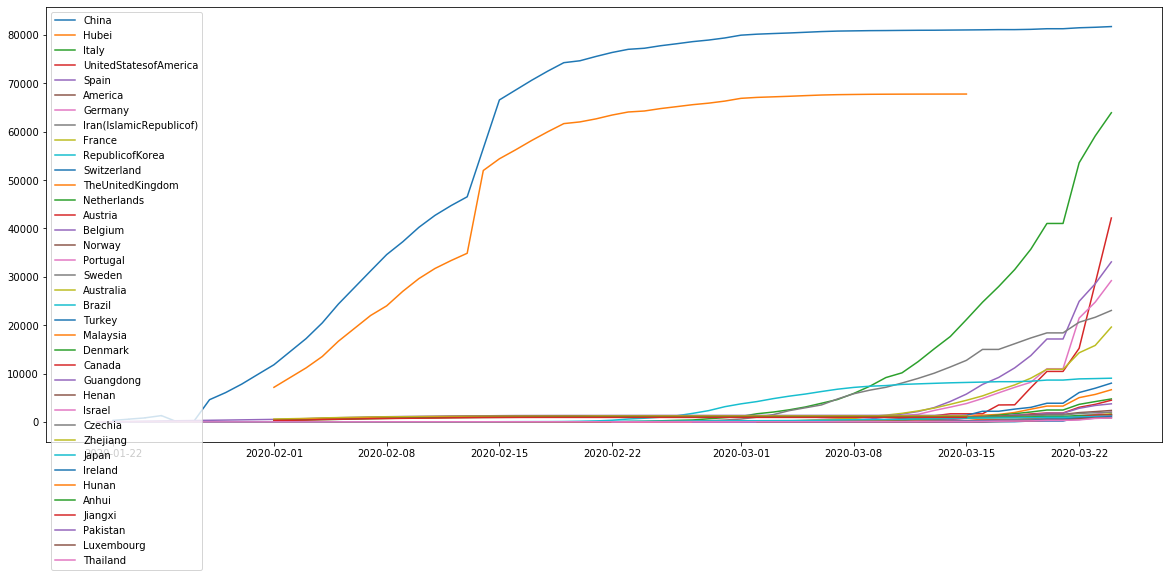

In [16]:
# adjust value and plot again
# the right value for 2020 02 14 is 51986 but in values there is 51 and 986 separated (this is caused by parsing problems)
d.loc[(d['name']=='Hubei') & (d['date']==datetime.datetime(2020,2,14)),'cases']=51986
# there are two rows for China for the same date, the right value is the max of the two ones
wrongRows = (d['name']=='China') & (d['date']==datetime.datetime(2020,2,8))
d.loc[wrongRows,'cases']=max(d.loc[wrongRows,'cases'])
wrongRows = (d['name']=='China') & (d['date']==datetime.datetime(2020,2,10))
d.loc[wrongRows,'cases']=max(d.loc[wrongRows,'cases'])
plotAndSave(d, countries, 'date', path)


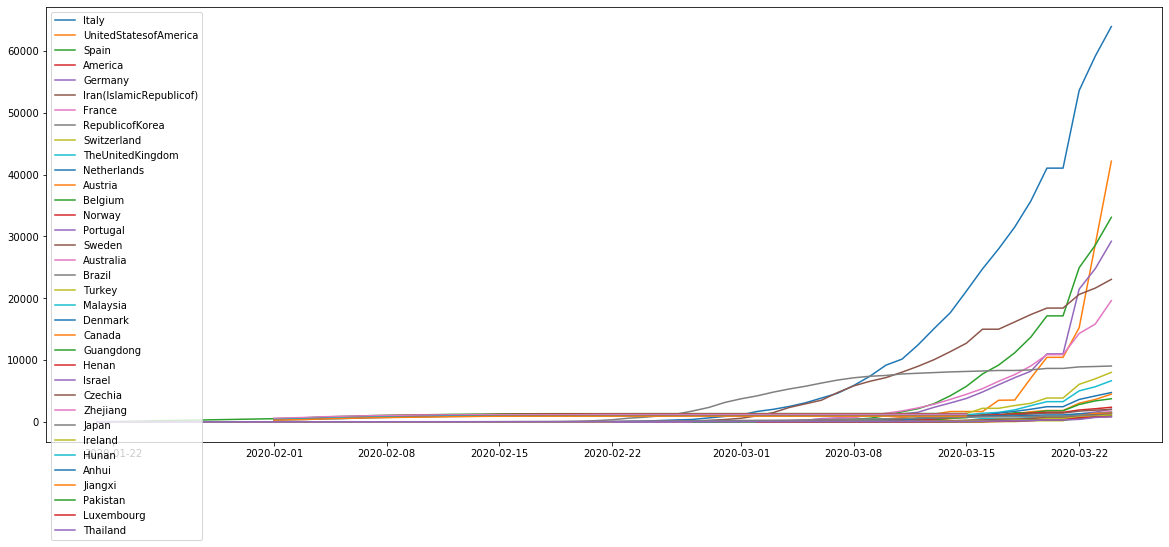

In [17]:
ccountries = [c for c in countries if c != 'Hubei' and 'China' not in c]
path = 'epidemiologicalCurveByCountryWithoutChina.png'
plotAndSave(d, ccountries, 'date', path)

In [18]:
# let's compare trend among differenc countries
# get date for each country in wich began 50 or more cases
def getRelDayDt(d,cases):
    dates=d[d['cases']>=cases].groupby('name').agg({'date':['first']})
    dates.columns = ['_'.join(col) for col in dates.columns]
    dates=dates.reset_index()
    dd=d.merge(dates, on='name', how='left')
    dd['day']=(dd['date']-dd['date_first']).dt.days
    return dd

dd = getRelDayDt(d,50)

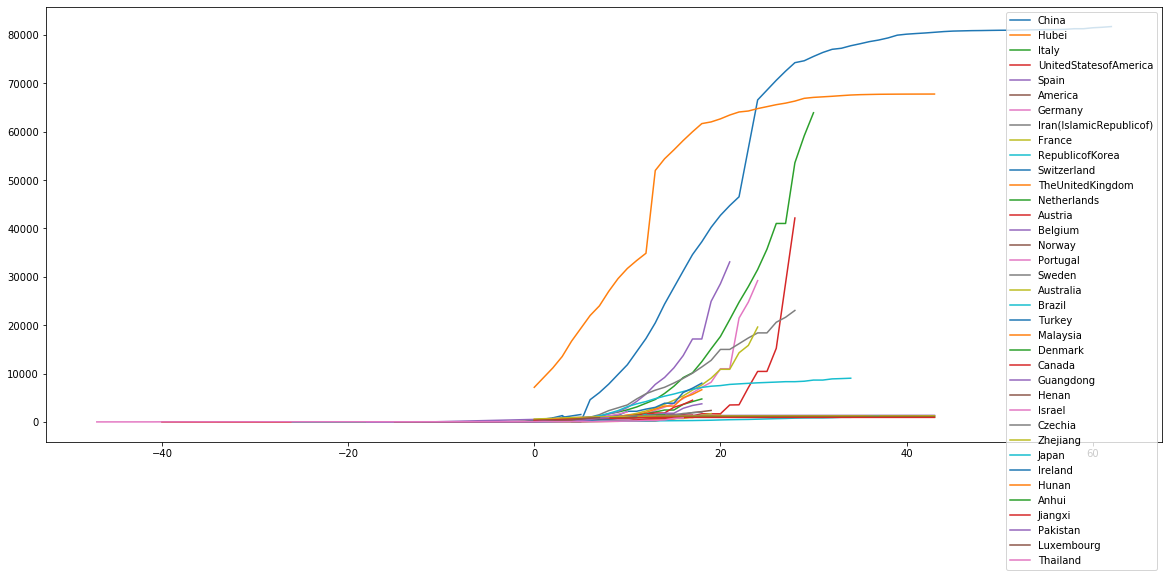

In [19]:
path = 'epidemiologicalCurveByCountryRel.png'
plotAndSave(dd, countries, 'day', path)

In [20]:
countries = ['Italy','RepublicofKorea','Iran(IslamicRepublicof)','Spain','France','Germany','UnitedStatesofAmerica']

esc_lst = ['^'+re.escape(s)+'$' for s in countries]
pattern = '|'.join(esc_lst)
dt = dd[(dd['name'].str.contains(pattern, case=False)) & (dd['day']>-6)]

a=dt.pivot_table(index=['day'],columns=['name'],values=['cases'],aggfunc=np.sum)
a.columns=a.columns.droplevel()
a.to_csv('casesByCountry.csv')
a

name,France,Germany,Iran(IslamicRepublicof),Italy,RepublicofKorea,Spain,UnitedStatesofAmerica
day,,,,,,,
-5.0,12.0,16.0,2.0,3.0,28.0,12.0,15.0
-4.0,12.0,16.0,5.0,3.0,28.0,25.0,15.0
-3.0,12.0,18.0,18.0,3.0,29.0,32.0,35.0
-2.0,18.0,21.0,28.0,3.0,30.0,45.0,35.0
-1.0,38.0,26.0,43.0,9.0,31.0,45.0,35.0
0.0,57.0,57.0,61.0,76.0,51.0,114.0,53.0
1.0,100.0,57.0,95.0,124.0,104.0,151.0,53.0
2.0,100.0,129.0,141.0,229.0,204.0,198.0,59.0
3.0,191.0,157.0,245.0,322.0,346.0,257.0,59.0


In [21]:
p=pandas.read_csv('data/ITAregioni.csv')
p['cases']=p['totale_casi']
p['date']=p['data']
p['date']=pandas.to_datetime(p['data'])
p ['name']=p['denominazione_regione']
p['name']=p['name'].str.replace('Friuli V. G. ','Friuli Venezia Giulia')
p.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,cases,date,name
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,5,NaN,NaN,0,2020-02-24 18:00:00,Abruzzo
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,0,NaN,NaN,0,2020-02-24 18:00:00,Basilicata
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,...,0,0,0,0,1,NaN,NaN,0,2020-02-24 18:00:00,P.A. Bolzano
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,1,NaN,NaN,0,2020-02-24 18:00:00,Calabria
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,10,NaN,NaN,0,2020-02-24 18:00:00,Campania


In [22]:
min_cases=100
cm = getCountriesWithHighestCases(p, min_cases)
countries = cm['name']#[ c for c in cm['name'] if c != 'In fase di definizione/aggiornamento']
countries

8                 Lombardia
4            Emilia Romagna
20                   Veneto
13                 Piemonte
17                  Toscana
9                    Marche
7                   Liguria
6                     Lazio
12              P.A. Trento
3                  Campania
5     Friuli Venezia Giulia
14                   Puglia
16                  Sicilia
11             P.A. Bolzano
0                   Abruzzo
18                   Umbria
15                 Sardegna
19            Valle d'Aosta
2                  Calabria
1                Basilicata
Name: name, dtype: object

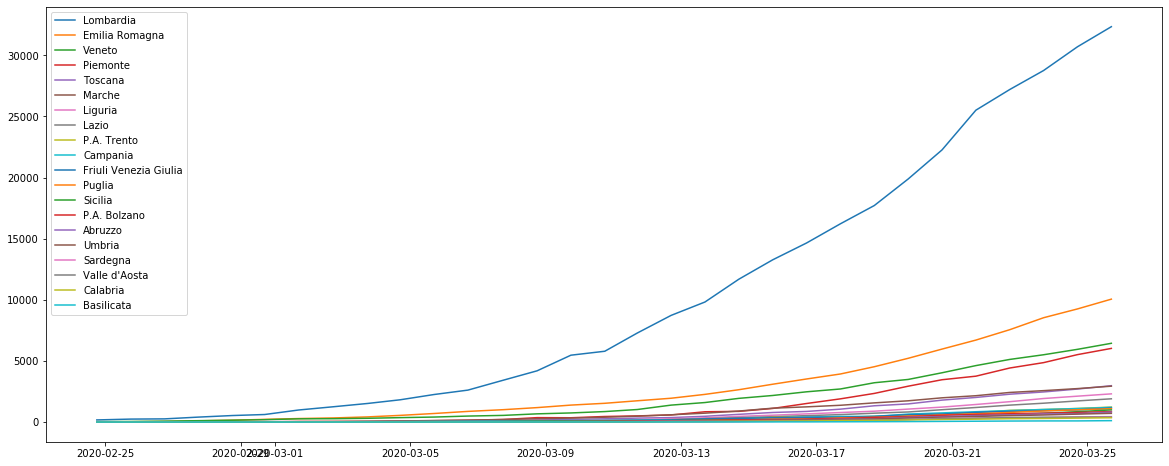

In [23]:
path = 'epidemiologicalCurveByRegionITA.png'
plotAndSave(p, countries, 'date', path)

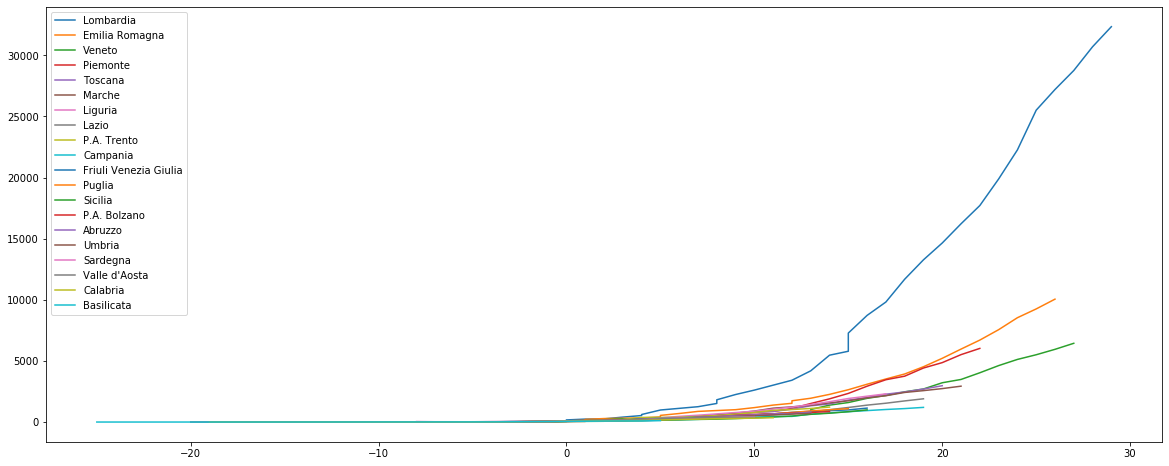

In [24]:
dd = getRelDayDt(p,50)
path = 'epidemiologicalCurveByRegionITARel.png'
plotAndSave(dd, countries, 'day', path)

In [25]:
p=pandas.read_csv('data/ITAprovince.csv')
p['cases']=p['totale_casi']
p['date']=p['data']
p['date']=pandas.to_datetime(p['data'])
p ['name']=p['denominazione_provincia']
p.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,cases,date,name
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN,0,2020-02-24 18:00:00,Chieti
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN,0,2020-02-24 18:00:00,L'Aquila
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN,0,2020-02-24 18:00:00,Pescara
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN,0,2020-02-24 18:00:00,Teramo
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN,0,2020-02-24 18:00:00,In fase di definizione/aggiornamento


In [26]:
min_cases=400
cm = getCountriesWithHighestCases(p, min_cases)
countries = [ c for c in cm['name'] if c != 'In fase di definizione/aggiornamento']
countries

['Bergamo',
 'Brescia',
 'Milano',
 'Cremona',
 'Torino',
 'Piacenza',
 'Lodi',
 'Padova',
 'Monza e della Brianza',
 "Reggio nell'Emilia",
 'Pavia',
 'Modena',
 'Parma',
 'Pesaro e Urbino',
 'Roma',
 'Verona',
 'Trento',
 'Treviso',
 'Mantova',
 'Rimini',
 'Bologna',
 'Lecco',
 'Alessandria',
 'Venezia',
 'Bolzano',
 'Vicenza',
 'Ancona',
 'Genova',
 'Firenze',
 'Como',
 'Napoli',
 'Perugia',
 'Novara',
 'Varese',
 'Forlì-Cesena',
 'Cuneo',
 'Lucca',
 'Udine',
 'Pescara',
 'Aosta']

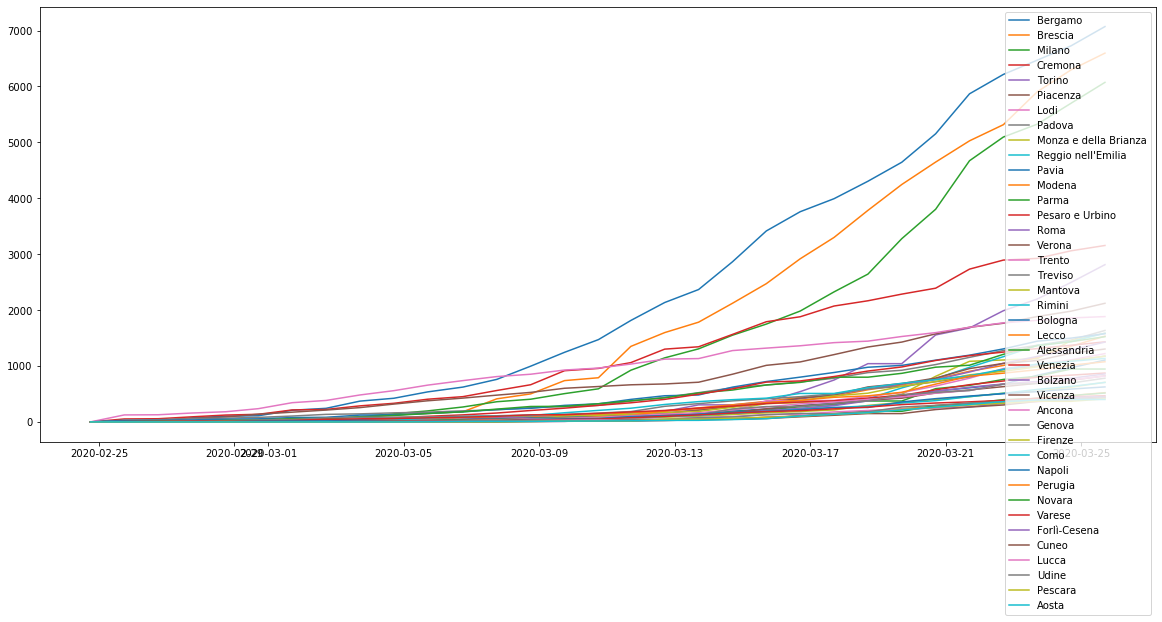

In [27]:
path = 'epidemiologicalCurveByProvinceITA.png'
plotAndSave(p, countries, 'date', path)

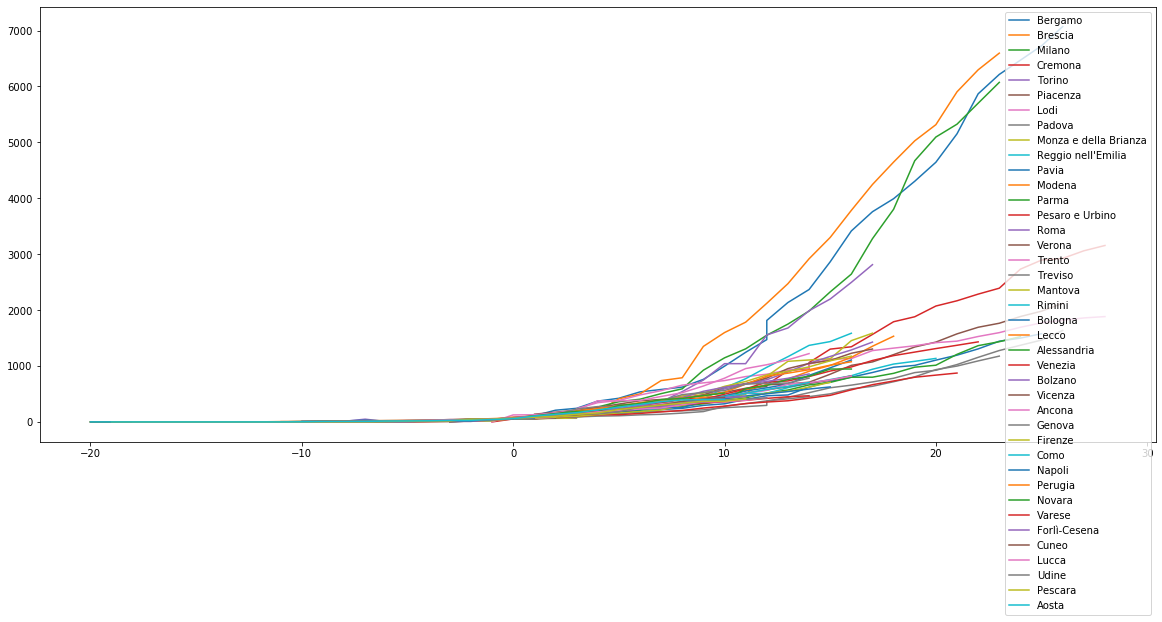

In [28]:
dd = getRelDayDt(p,50)
path = 'epidemiologicalCurveByProvinceITARel.png'
plotAndSave(dd, countries, 'day', path)